### Import the necessary libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from scipy.signal import welch

### Read the datasets

In [2]:
asphalt_df = pd.read_csv('./datasets/afw.csv') # Reading the asphalt dataset

concrete_df = pd.read_csv('./datasets/cfd.csv') # Reading the concrete dataset

grass_df = pd.read_csv('./datasets/gsw.csv') # Reading the grass dataset

stone_df = pd.read_csv('./datasets/scw.csv') # Reading the stone dataset

tile_df = pd.read_csv('./datasets/ts.csv') # Reading the tile dataset

In order to better explore the data, we will consolidate the 5 datasets as one.

In [3]:
df = pd.concat([asphalt_df, concrete_df, grass_df, stone_df, tile_df], axis = 0) # Joining the 5 datasets as one

df = df.reset_index(drop = True)

### Exploratory Data Analysis

In [4]:
df.head(5) # Check for the first 5 rows

x accelerometer  y accelerometer  z accelerometer    x gyro    y gyro  \
0        -0.087402         0.024414        -0.899170 -1.220703 -0.686645   
1        -0.162354         0.053223        -0.816895 -1.525879 -1.281738   
2        -0.010254         0.014160        -1.160156  0.717163 -0.503540   
3         0.208252         0.027588        -1.086426 -0.473022  0.625610   
4        -0.027832        -0.030029        -0.930908 -3.982544  2.029419   

     z gyro  surface  
0 -0.961304  asphalt  
1  0.488281  asphalt  
2  0.183105  asphalt  
3 -1.007080  asphalt  
4 -0.228882  asphalt

In [5]:
df.tail() # Check the last 5 rows

x accelerometer  y accelerometer  z accelerometer    x gyro    y gyro  \
72726         0.016602        -0.080322        -0.970215  1.251221  0.396728   
72727        -0.008789        -0.092773        -1.009033  1.617432  0.656128   
72728         0.013428        -0.066162        -0.994141  1.907349  0.717163   
72729        -0.018311        -0.072998        -1.035645  1.754761  0.686645   
72730        -0.002197        -0.045898        -1.023193  1.922607  0.106812   

         z gyro surface  
72726  2.548218    tile  
72727  3.036499    tile  
72728  3.158569    tile  
72729  2.975464    tile  
72730  3.265381    tile

In [6]:
df.info()  # Retrieve information about the dataset (dataframe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72731 entries, 0 to 72730
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x accelerometer  72731 non-null  float64
 1   y accelerometer  72731 non-null  float64
 2   z accelerometer  72731 non-null  float64
 3   x gyro           72731 non-null  float64
 4   y gyro           72731 non-null  float64
 5   z gyro           72731 non-null  float64
 6   surface          72731 non-null  object 
dtypes: float64(6), object(1)
memory usage: 3.9+ MB


The dataset comprises seven features: three aceelerometer axes (x, y, z), three gyro axes (x, y, z), and the surface type. The first six features are floating-point numbers, while the surface feature is a string. Although no data appears to be missing, we will perform a verification to confirm this.

In [7]:
df.isna().sum() # Explicitly checking for missing data

x accelerometer    0
y accelerometer    0
z accelerometer    0
x gyro             0
y gyro             0
z gyro             0
surface            0
dtype: int64

There are no missing data in the dataset

In [8]:
df.surface.unique() # Checking for the unique data in the surface feature

array(['asphalt', 'concrete', 'grass', 'stones', 'tile'], dtype=object)

The unique check on the surface feature confirmed the dataset contains data collected from only 5 distinct surfaces.

In [9]:
df.groupby('surface').describe() # Obtain statistical information of the numerical features

x accelerometer                                                    \
                   count      mean       std       min       25%       50%   
surface                                                                      
asphalt          15982.0  0.008560  0.127686 -0.905029 -0.066650  0.009277   
concrete         14802.0 -0.008975  0.130861 -0.909912 -0.080322 -0.008789   
grass            13343.0 -0.015268  0.107228 -0.874756 -0.069092 -0.016846   
stones           16224.0 -0.067117  0.091327 -0.556641 -0.120361 -0.068604   
tile             12380.0 -0.004274  0.052843 -0.282715 -0.035156 -0.004150   

                             y accelerometer            ...    y gyro  \
               75%       max           count      mean  ...       75%   
surface                                                 ...             
asphalt   0.083008  1.026123         15982.0 -0.043895  ...  1.419067   
concrete  0.062500  0.847412         14802.0 -0.040968  ...  1.174927   
grass     0.038574  0.841797         13343.0 -0.246764  ...  3.654479   
stones   -0.012451  0.549316         16224.0 -0.093431  ...  2.517700   
tile      0.027100  0.410645         12380.0 -0.042336  ...  0.686645   

                      z gyro                                            \
                max    count      mean        std        min       25%   
surface                                                                  
asphalt   14.221190  15982.0  0.165666   3.252399 -15.014647 -1.815796   
concrete  14.694213  14802.0  0.102785   2.955007 -14.862060 -1.831055   
grass     31.112669  13343.0 -0.033588   6.308783 -25.634764 -4.196167   
stones    47.164913  16224.0  0.079315  11.477493 -66.802979 -4.673004   
tile       4.730225  12380.0  0.032497   2.033406  -8.758545 -1.296997   

                                         
               50%       75%        max  
surface                                  
asphalt   0.122070  2.136230  15.960692  
concrete -0.030518  1.922607  12.084960  
grass     0.000000  4.028320  30.441282  
stones    0.091553  4.760742  81.130974  
tile     -0.091553  1.281738  10.391234  

[5 rows x 48 columns]

The above gives statistical information about the numerical features in the dataset for each surfaces in the dataset.

### Distribution of the features for each surface - Histogram

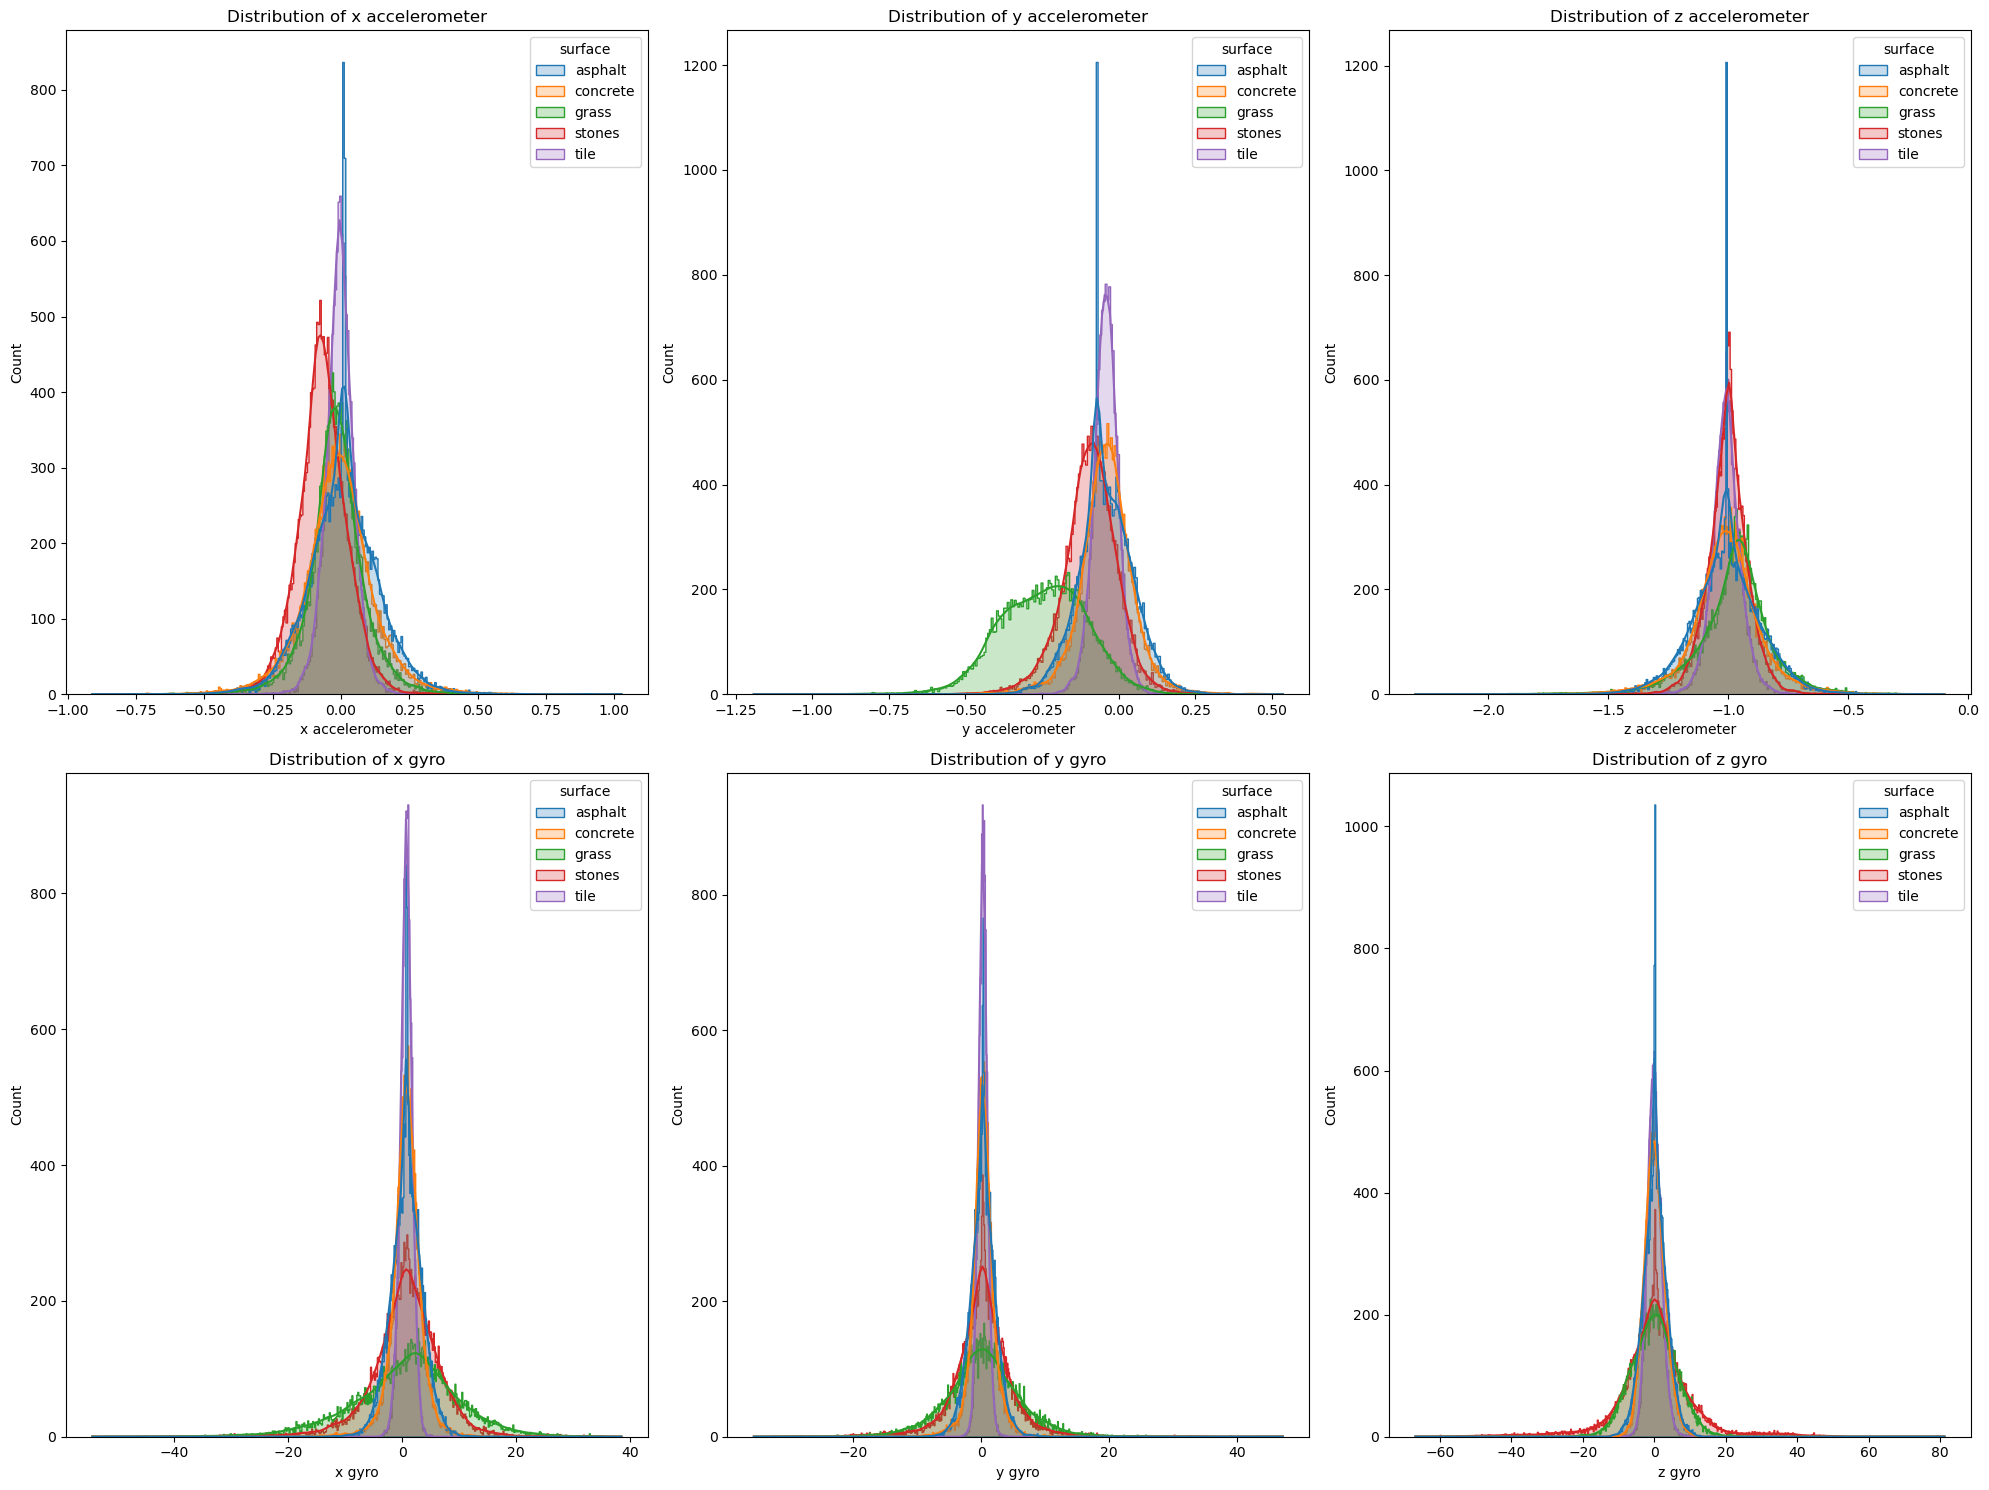

In [10]:
plt.figure(figsize = (20, 15))

for i, feature in enumerate(df.columns[:6], 1):
    
    plt.subplot(2, 3, i)
    
    sns.histplot(data = df, x = feature, kde = True, hue = 'surface', element = 'step',
                
                palette = 'tab10')
    
    plt.title(f'Distribution of {feature}')
    
plt.tight_layout()

plt.show()

The distributions of each numerical feature for the different surfaces, as shown in the plots above are mostly symmetrical around their means. Additionally, the gyro features exhibit a much wider range than the accelerometer features

### Box Plots

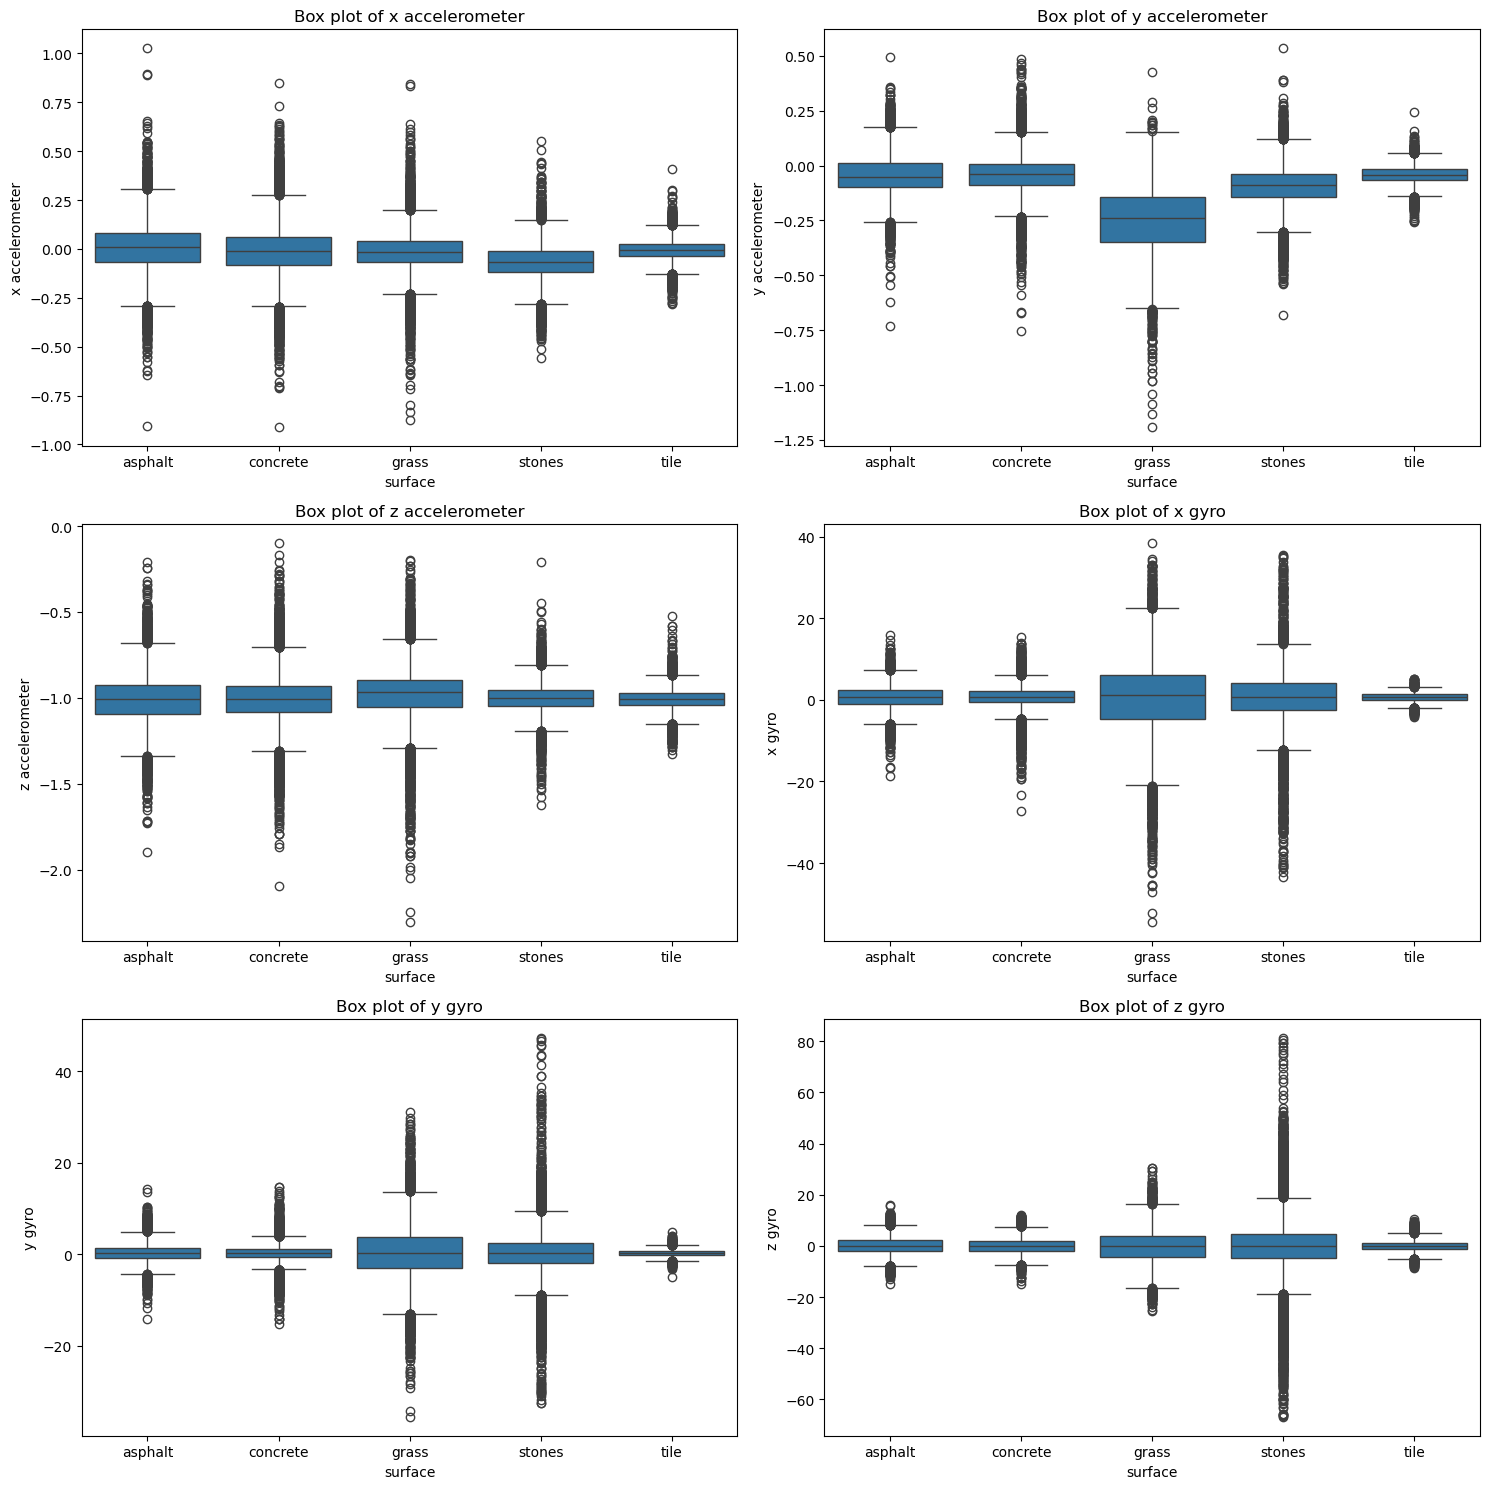

In [11]:
plt.figure(figsize = (15, 15))

for i, feature in enumerate(df.columns[:-1], 1):
    
    plt.subplot(3, 2, i)
    
    sns.boxplot(x = 'surface', y = feature, data = df)
    
    plt.title(f'Box plot of {feature}')
    
plt.tight_layout()

plt.show()

The box plots shows that the tile surface has the lowest interquartile range (IQR), suggesting less variability, potentially due to its smoothness. Conversely, the grass surface exhibits the highest IQR, indicating greater variability, whcih could be attributed to its uneveness (slope).

### Correlations

#### HeatMap

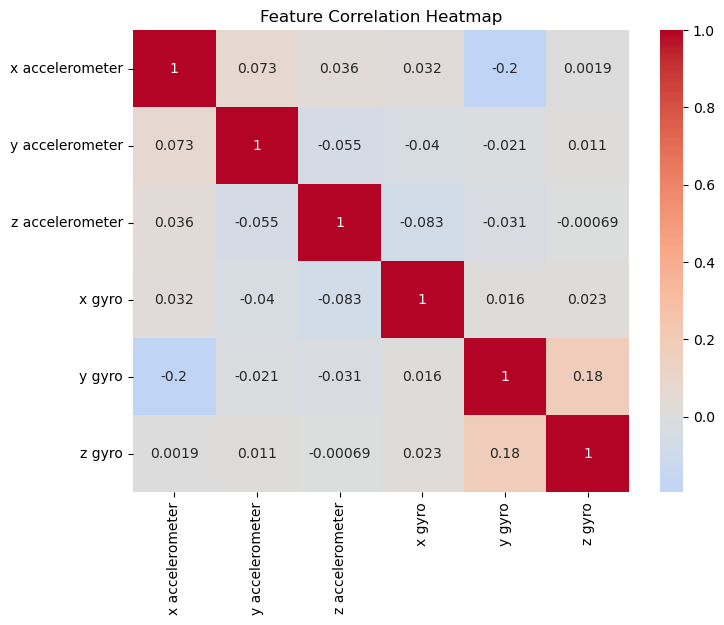

In [13]:
df_2 = df.drop(['surface'], axis = 1)

corr = df_2.corr()

plt.figure(figsize = (8, 6))

sns.heatmap(corr, annot = True, cmap = 'coolwarm', center = 0)

plt.title('Feature Correlation Heatmap')

plt.show()

The heatmap illustrates weak or no correlation between the dataset's features

#### Pairwise Relationships

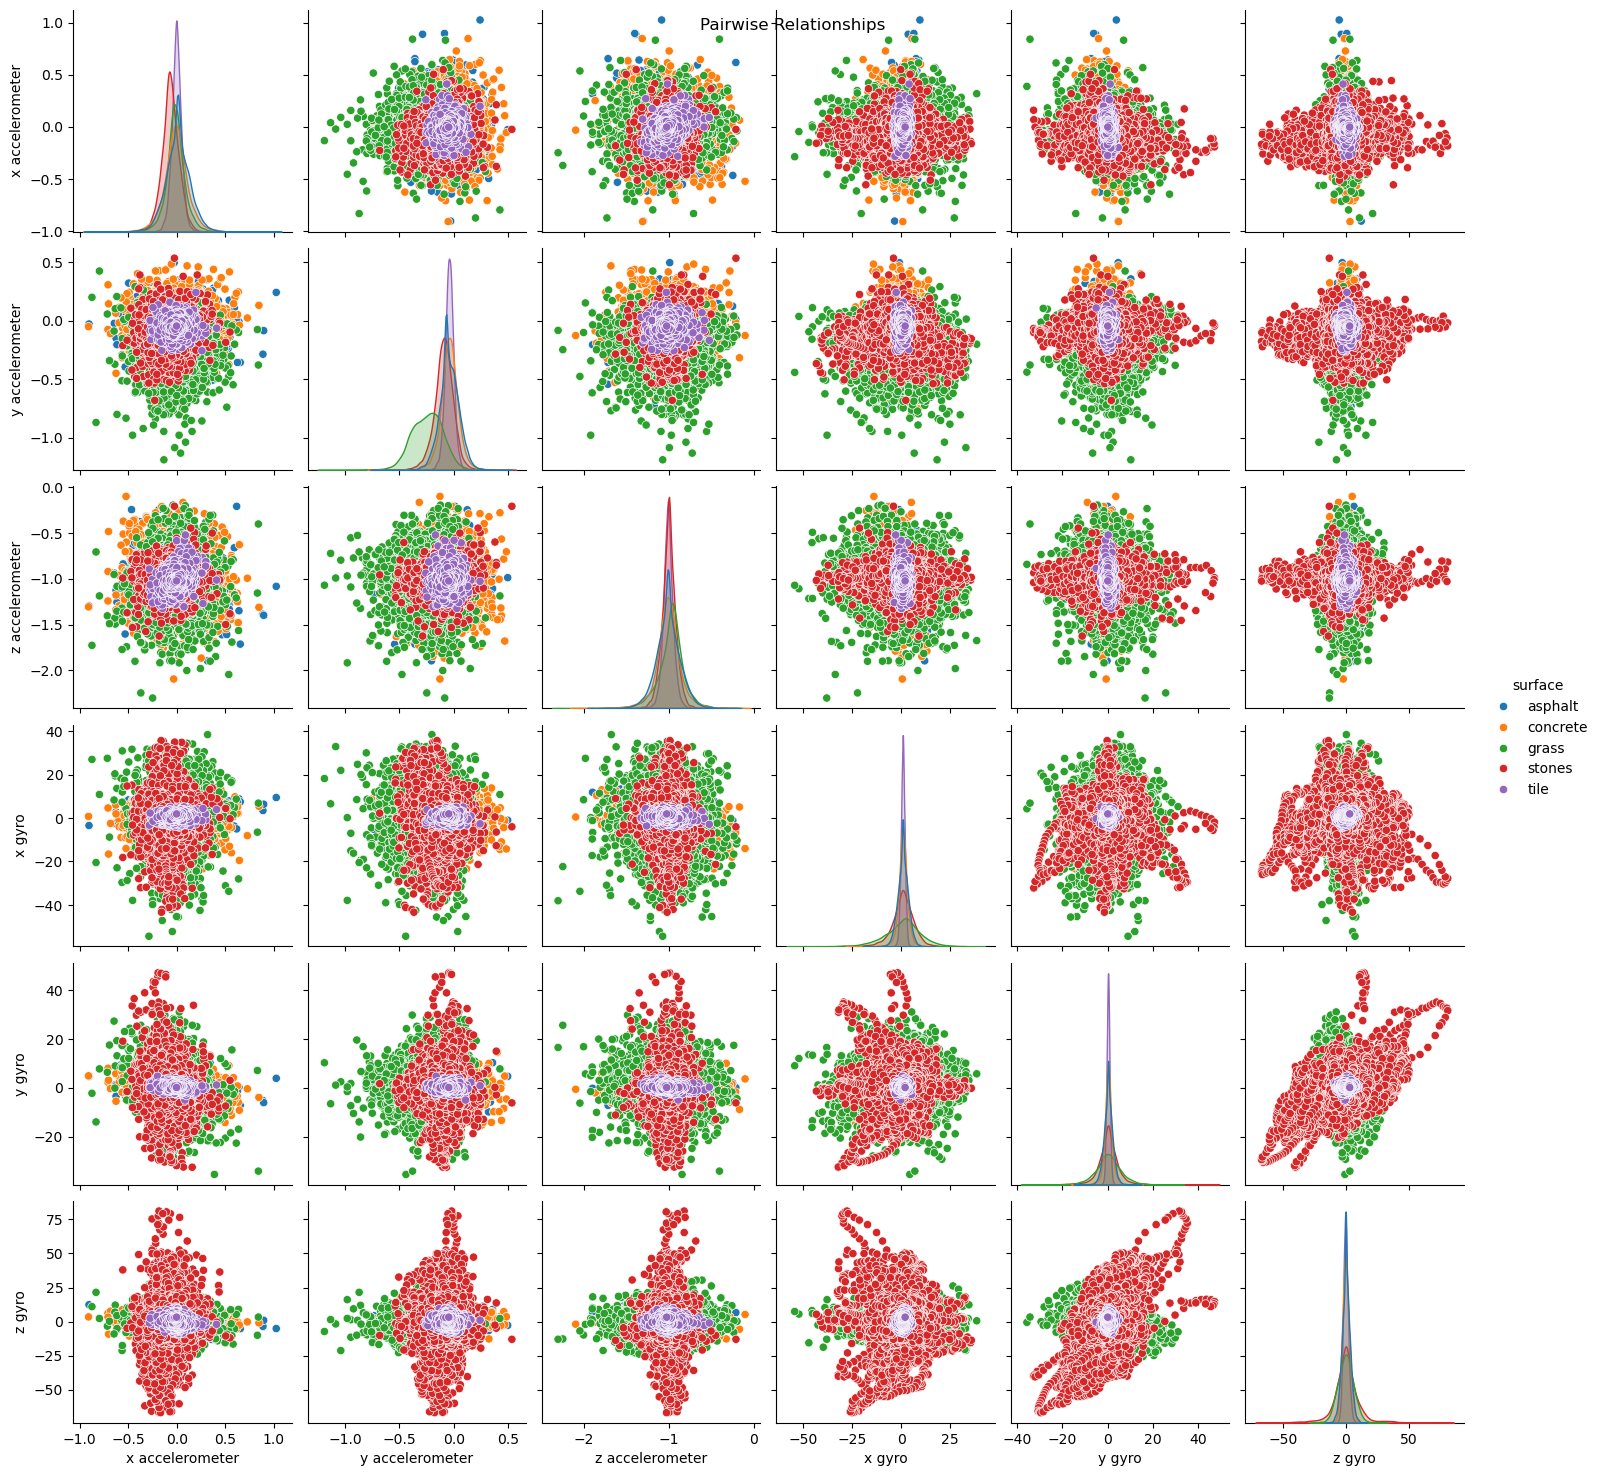

In [14]:
sns.pairplot(df, hue = 'surface')

plt.suptitle('Pairwise Relationships', verticalalignment = 'top')

plt.show()

The pairwise plots suggest that none of the feature combinations distinctly classify the surface types

Since the goal of the project is for surface classifications rather directional surface classification , we are better off consolidating the accelerometer and gyro data (x, y, z) into a single absolute value

In [15]:
df_consolidated = df.copy() # make a copy of the initial dataframe

In [16]:
# create a new column accelerometer and gyro which is absolute value of the x, y, z of the accelerometer and gyro respectively

df_consolidated['accelerometer'] = np.sqrt(df['x accelerometer']**2 + df['y accelerometer']**2
                                        + df['z accelerometer']**2)

df_consolidated['gyro'] = np.sqrt(df['x gyro']**2 + df['y gyro']**2 + df['z gyro']**2)

In [17]:
#drop the x, y, z of the accelerometer and gyro columns

df_consolidated = df_consolidated.drop(['x accelerometer', 'y accelerometer', 'z accelerometer',
                                       'x gyro', 'y gyro', 'z gyro' ], axis = 1)

# Re-arrange the columns

df_consolidated = df_consolidated.iloc[:,[1, 2, 0]]

In [18]:
df_consolidated.head()

accelerometer      gyro  surface
0       0.903738  1.698736  asphalt
1       0.834571  2.051725  asphalt
2       1.160288  0.895211  asphalt
3       1.106549  1.276459  asphalt
4       0.931808  4.475666  asphalt

In [19]:
df_consolidated.groupby('surface').describe()

accelerometer                                                    \
                 count      mean       std       min       25%       50%   
surface                                                                    
asphalt        15982.0  1.021376  0.143321  0.333354  0.937736  1.012330   
concrete       14802.0  1.021425  0.145512  0.259486  0.942303  1.016128   
grass          13343.0  1.024909  0.157089  0.225849  0.947332  1.013478   
stones         16224.0  1.016129  0.085975  0.519965  0.966625  1.013929   
tile           12380.0  1.010689  0.062206  0.555141  0.975582  1.010648   

                                 gyro                                 \
               75%       max    count       mean       std       min   
surface                                                                
asphalt   1.103878  1.933031  15982.0   4.191618  2.305112  0.123021   
concrete  1.092958  2.098581  14802.0   3.868675  2.325755  0.037377   
grass     1.089665  2.316651  13343.0  11.160536  6.325691  0.278447   
stones    1.063099  1.660164  16224.0  10.605186  9.338974  0.103490   
tile      1.046508  1.331939  12380.0   2.199444  1.200133  0.074753   

                                                    
               25%       50%        75%        max  
surface                                             
asphalt   2.586489  3.936280   5.522143  22.018427  
concrete  2.249870  3.439224   4.947761  27.375550  
grass     6.562849  9.961383  14.476883  55.656314  
stones    5.115291  8.066431  12.524788  91.487770  
tile      1.340778  1.988068   2.794848  10.556137

While there isn't so much difference in the mean of the accelerometer across the 5 surfaces, extracting the mean and max of the gyro could help in surface classifications

### Time Plots

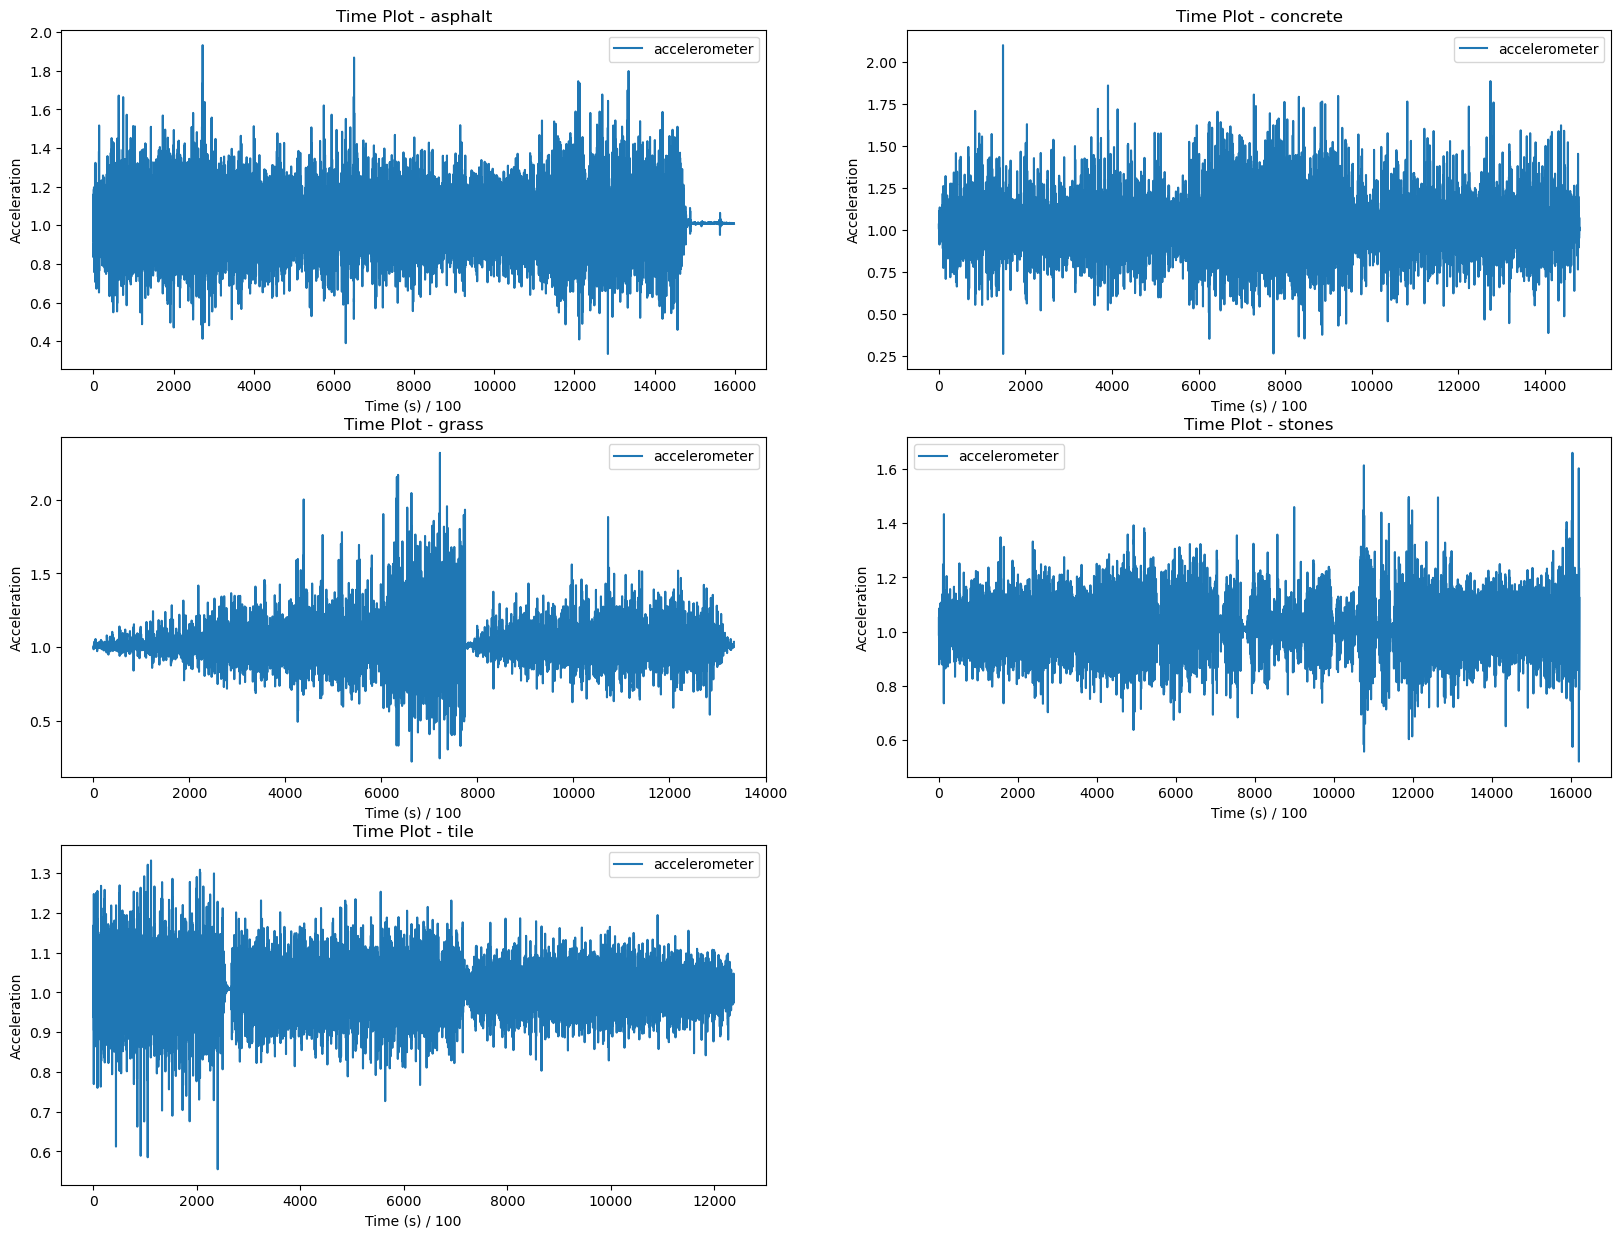

In [20]:
plt.figure(figsize = (20, 15))

names_list = ['asphalt', 'concrete', 'grass', 'stones', 'tile']

for index, name in enumerate(names_list):

    plt.subplot(3, 2, index + 1)

    i_df = df_consolidated[df_consolidated['surface'] == name].reset_index(drop = True)

    plt.plot(i_df['accelerometer'], label = 'accelerometer')

    plt.title(f'Time Plot - {name}')

    plt.xlabel('Time (s) / 100')

    plt.ylabel('Acceleration')

    plt.legend()

The time plot for asphlat shows a flat trend towards the end, suggesting a period of inactivity. This segement should be removed from the analysis.

The grass plot displays a distinct trend due to the surface'sloping nature, in contrast to the flatness of the oher surfaces.

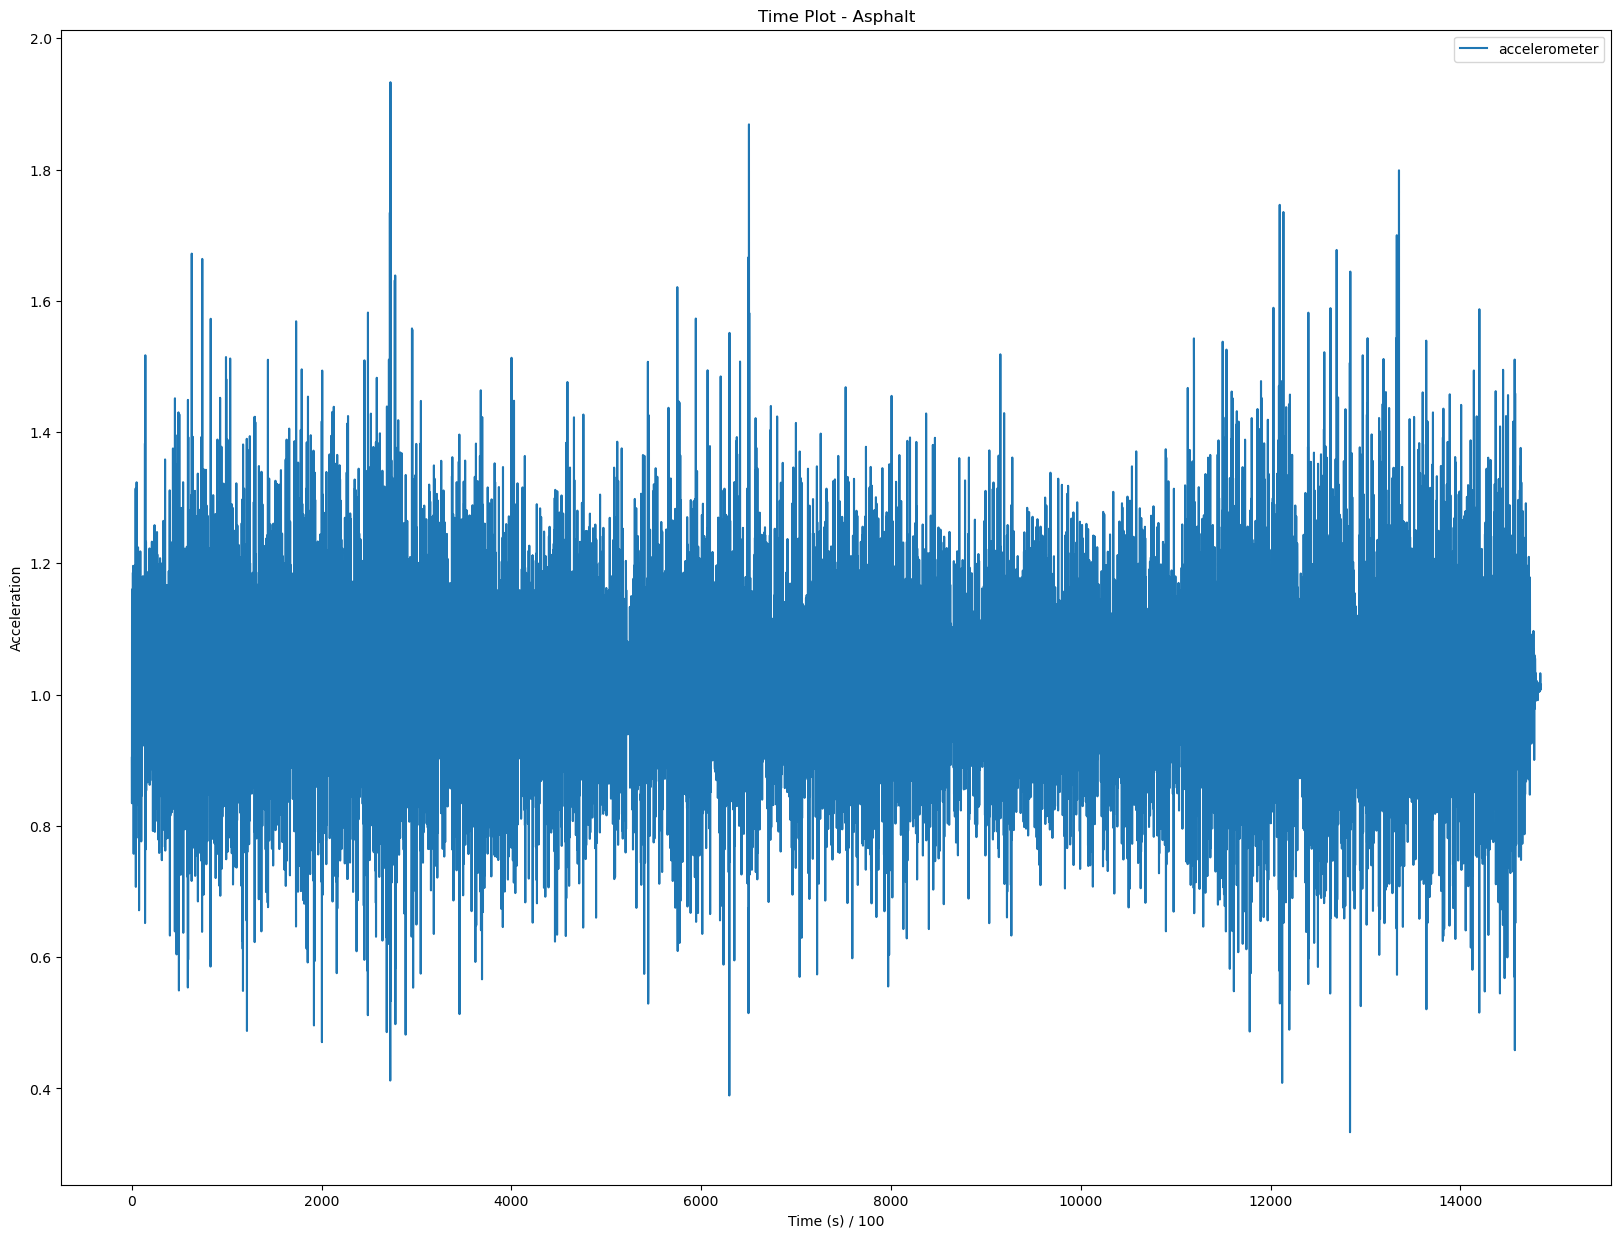

In [21]:
asphalt_consolidated_df = df_consolidated[df_consolidated['surface'] == 'asphalt']

asphalt_consolidated_df2 = asphalt_consolidated_df[0:14850]

plt.figure(figsize = (20, 15))

plt.plot(asphalt_consolidated_df2['accelerometer'], label = 'accelerometer')

plt.title('Time Plot - Asphalt')

plt.xlabel('Time (s) / 100')

plt.ylabel('Acceleration')

plt.legend()

The flat surface in the asphalt time plot has been removed.

In [22]:
concrete_consolidated_df = df_consolidated[df_consolidated['surface'] == 'concrete'].reset_index(drop = True)

grass_consolidated_df = df_consolidated[df_consolidated['surface'] == 'grass'].reset_index(drop = True)

stone_consolidated_df = df_consolidated[df_consolidated['surface'] == 'stones'].reset_index(drop = True)

tile_consolidated_df = df_consolidated[df_consolidated['surface'] == 'tile'].reset_index(drop = True)

In [23]:
df_consolidated2 = pd.concat([asphalt_consolidated_df2, concrete_consolidated_df, grass_consolidated_df, 
                              
                              stone_consolidated_df, tile_consolidated_df], axis = 0)

In [24]:
df_consolidated2 = df_consolidated2.reset_index(drop = True)

df_consolidated2.head()

accelerometer      gyro  surface
0       0.903738  1.698736  asphalt
1       0.834571  2.051725  asphalt
2       1.160288  0.895211  asphalt
3       1.106549  1.276459  asphalt
4       0.931808  4.475666  asphalt

In [25]:
df_consolidated2.to_csv('./datasets/imu_data.csv', index = False)

### Distribution of the features for each surface - Histogram

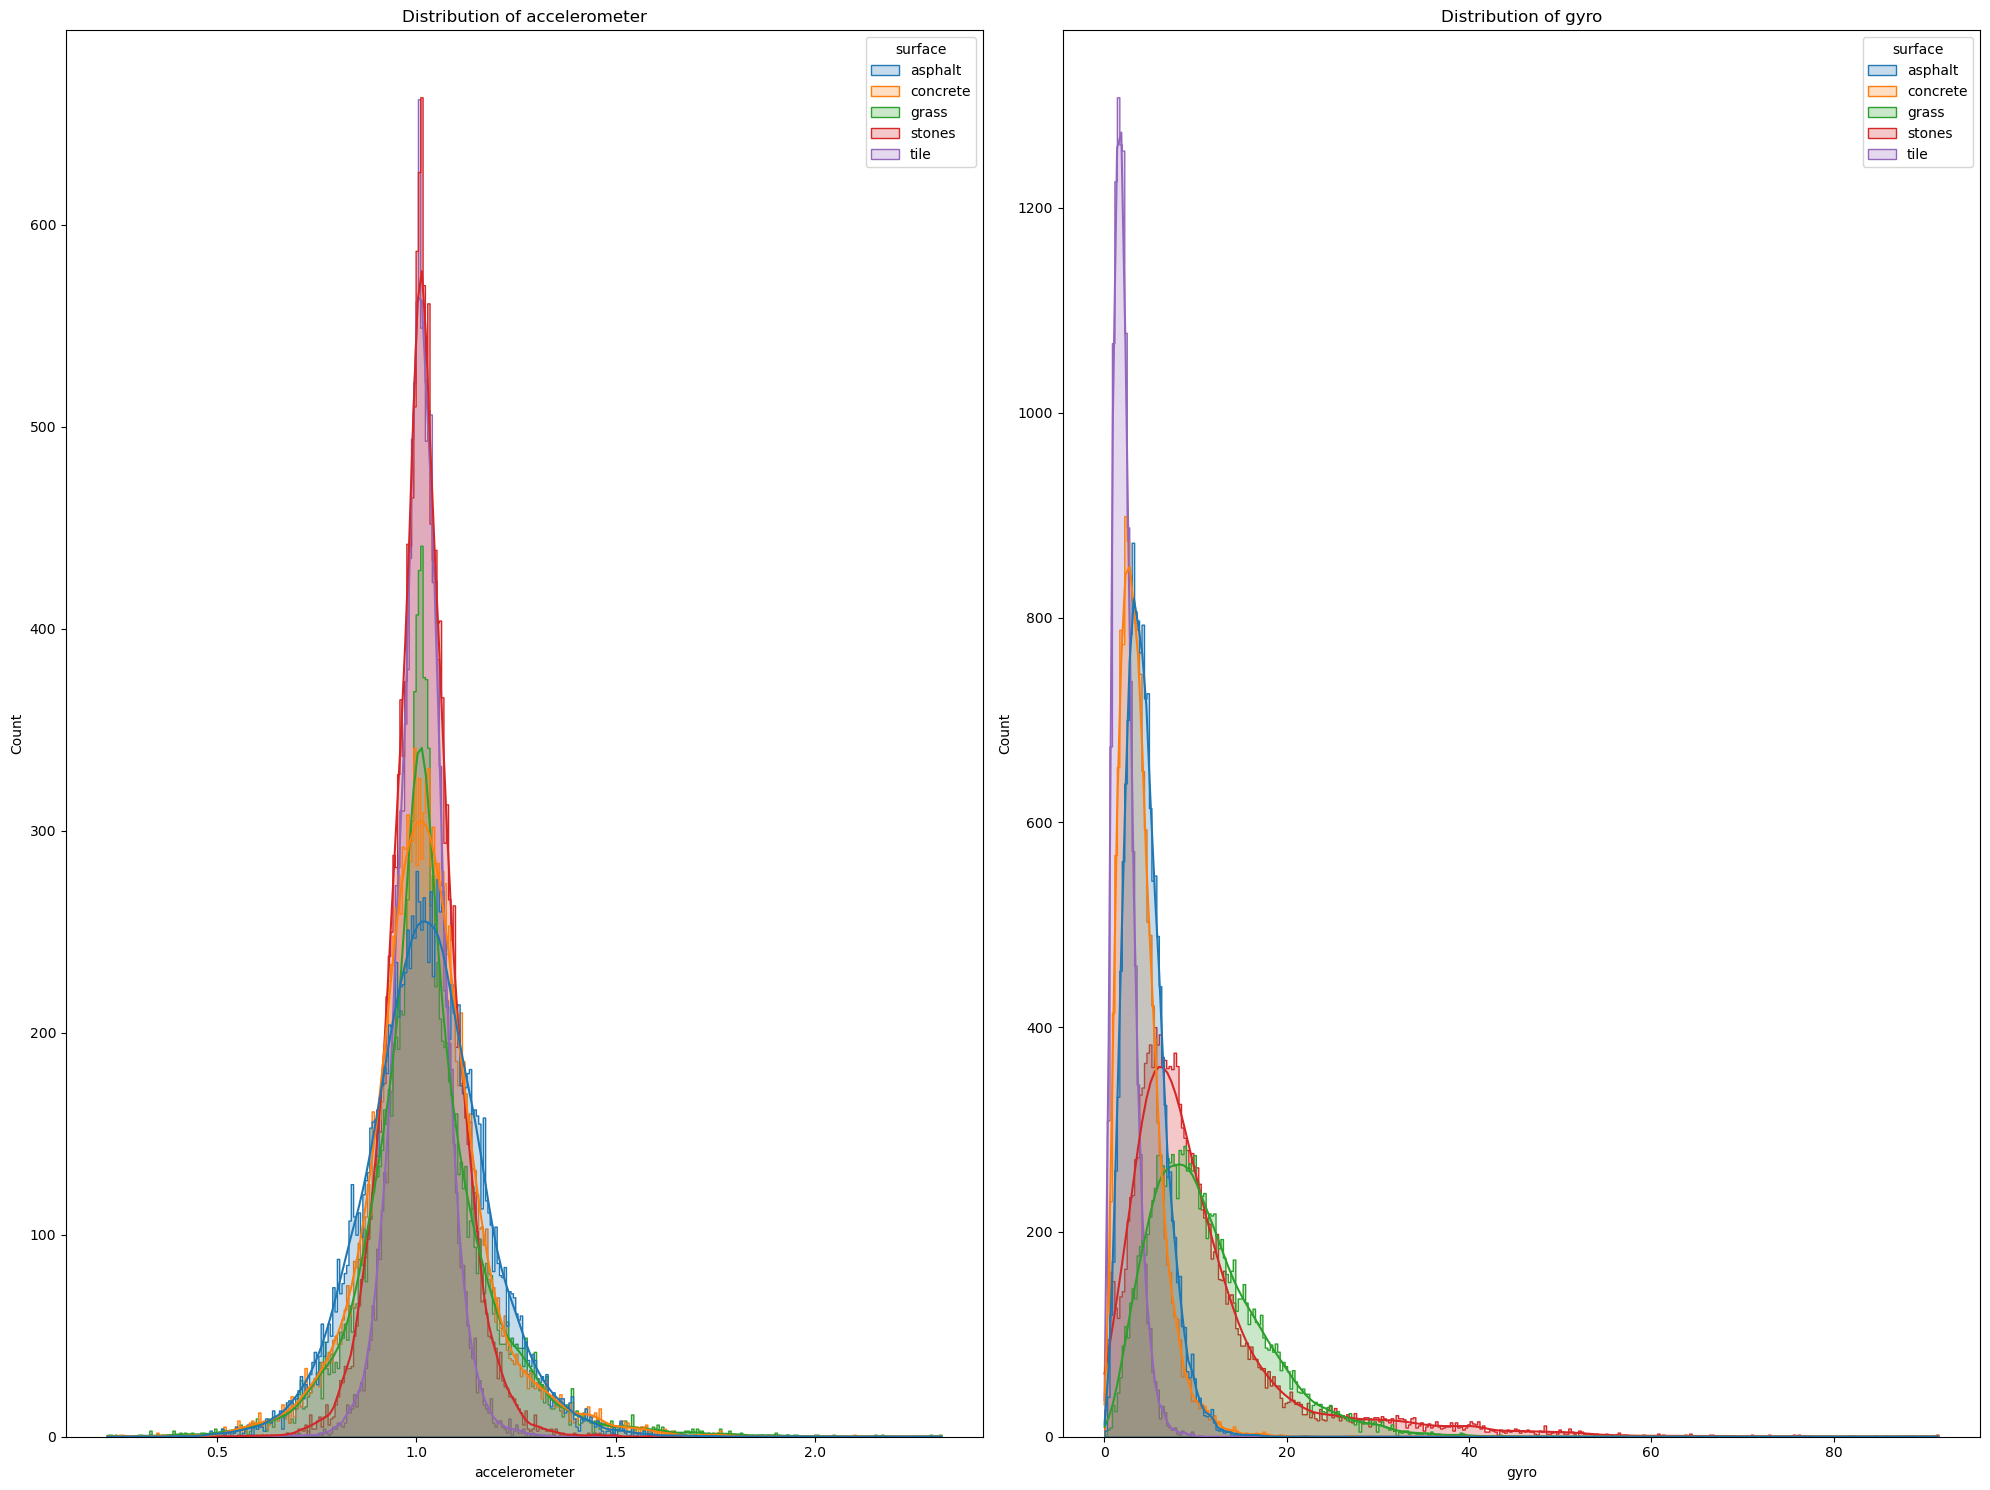

In [26]:
plt.figure(figsize = (20, 15))

for i, feature in enumerate(df_consolidated2.columns[:2], 1):
    
    plt.subplot(1, 2, i)
    
    sns.histplot(data = df_consolidated2, x = feature, kde = True, hue = 'surface', element = 'step',
                
                palette = 'tab10')
    
    plt.title(f'Distribution of {feature}')
    
plt.tight_layout()

plt.show()

The distributions of the accelerometer for the different surfaces, as shown in the plots above are mostly symmetrical around their means while that of the gyro exhibit right skewed behaviour across the different surfaces. Additionally, the gyro features exhibit a much wider range than the accelerometer features.

Also, the asphalt surface exhibit a lower heavy tailed pattern in both the accelerometer and gyro compared to the other surface and extracting the kurtosis during feature extraction could help in differentiating the asphalt surfaces from the other surfaces. Extracting the skewness could help play a part in differenting the surfaces also.

### Box Plots

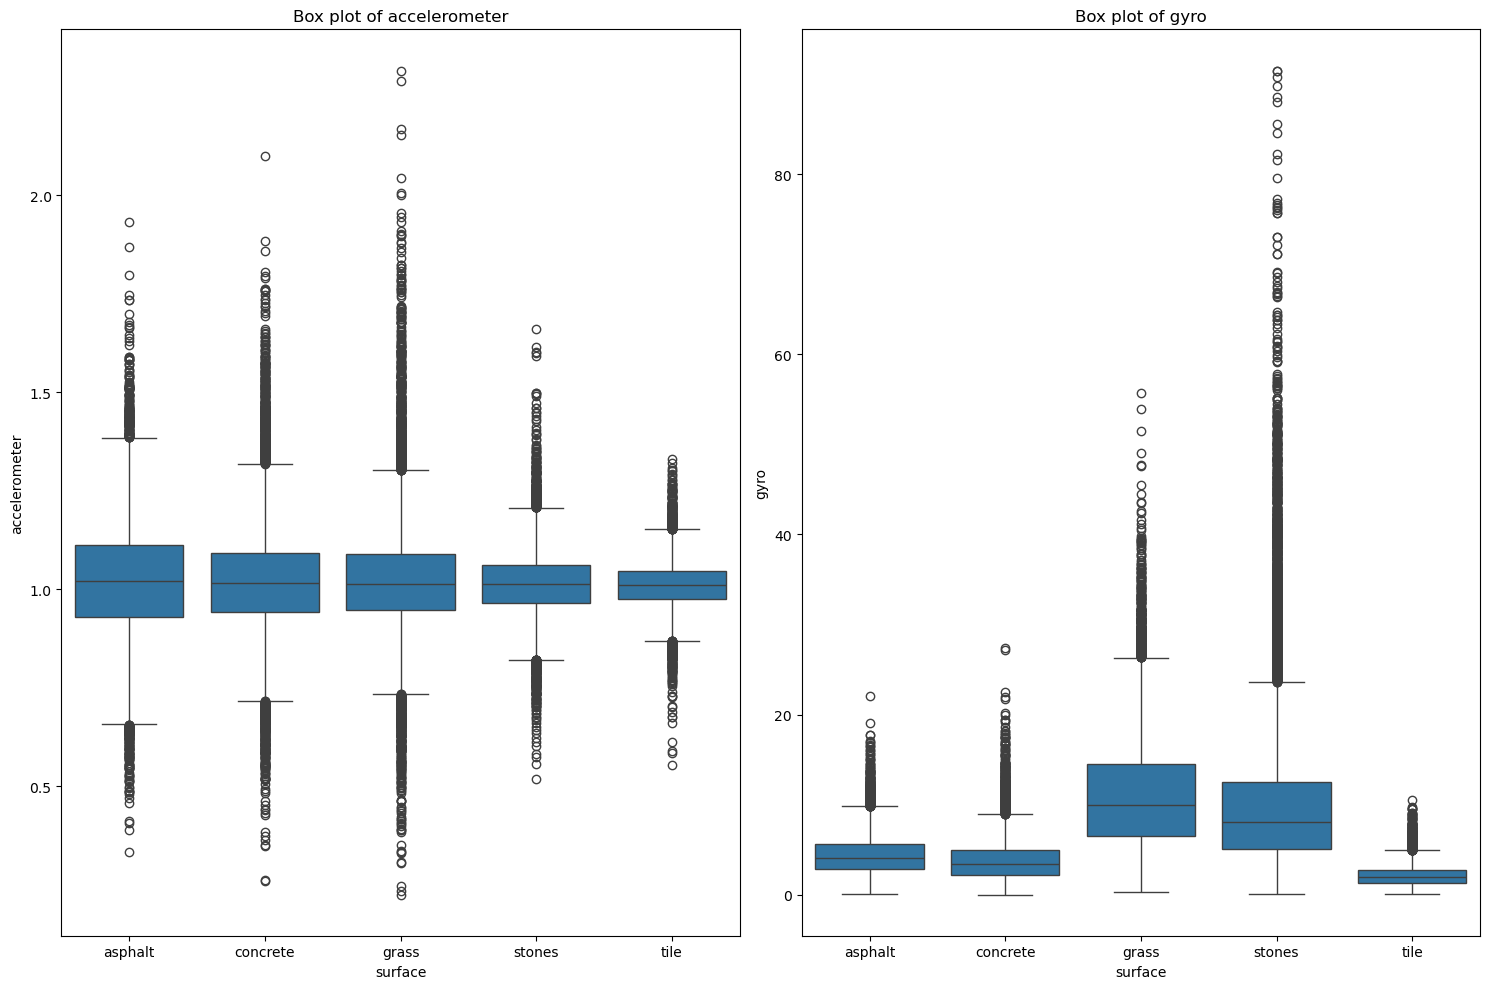

In [27]:
plt.figure(figsize = (15, 10))

for i, feature in enumerate(df_consolidated2.columns[:2], 1):
    
    plt.subplot(1, 2, i)
    
    sns.boxplot(x = 'surface', y = feature, data = df_consolidated2)
    
    plt.title(f'Box plot of {feature}')
    
plt.tight_layout()

plt.show()

The box plots shows that the tile surface has the lowest interquartile range (IQR) in both the accelerometer and gyro, suggesting less variability, likely due to its smoothness. Utilizing standard deviation as a feature during feature extraction could effectively differentiate tile from other surfaces

### Correlations

#### HeatMap

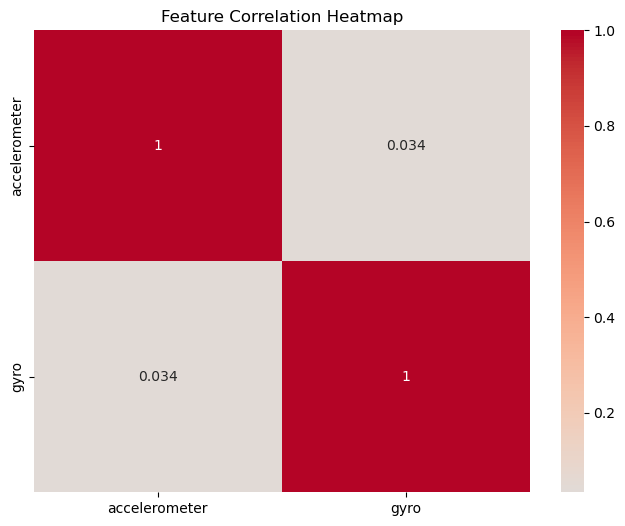

In [28]:
df_consolidated_2 = df_consolidated2.drop(['surface'], axis = 1)

corr = df_consolidated_2.corr()

plt.figure(figsize = (8, 6))

sns.heatmap(corr, annot = True, cmap = 'coolwarm', center = 0)

plt.title('Feature Correlation Heatmap')

plt.show()

The heatmap illustrates weak or no correlation between the accelerometer and the gyro

#### Pairwise Relationships

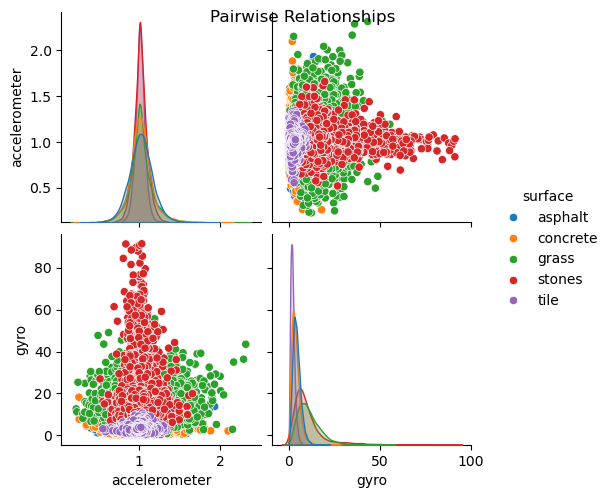

In [29]:
sns.pairplot(df_consolidated2, hue = 'surface')

plt.suptitle('Pairwise Relationships', verticalalignment = 'top')

plt.show()

The pairwise plots suggest that just plot of accelerometer vs the gyro or gyro vs the accelerometer doesn't distinctly classify the surface types

### Frequency Domain

To analyze the time series in terms of frequency, we will employ the Fourier Transform to convert the features from the time domain to the frequency domain.

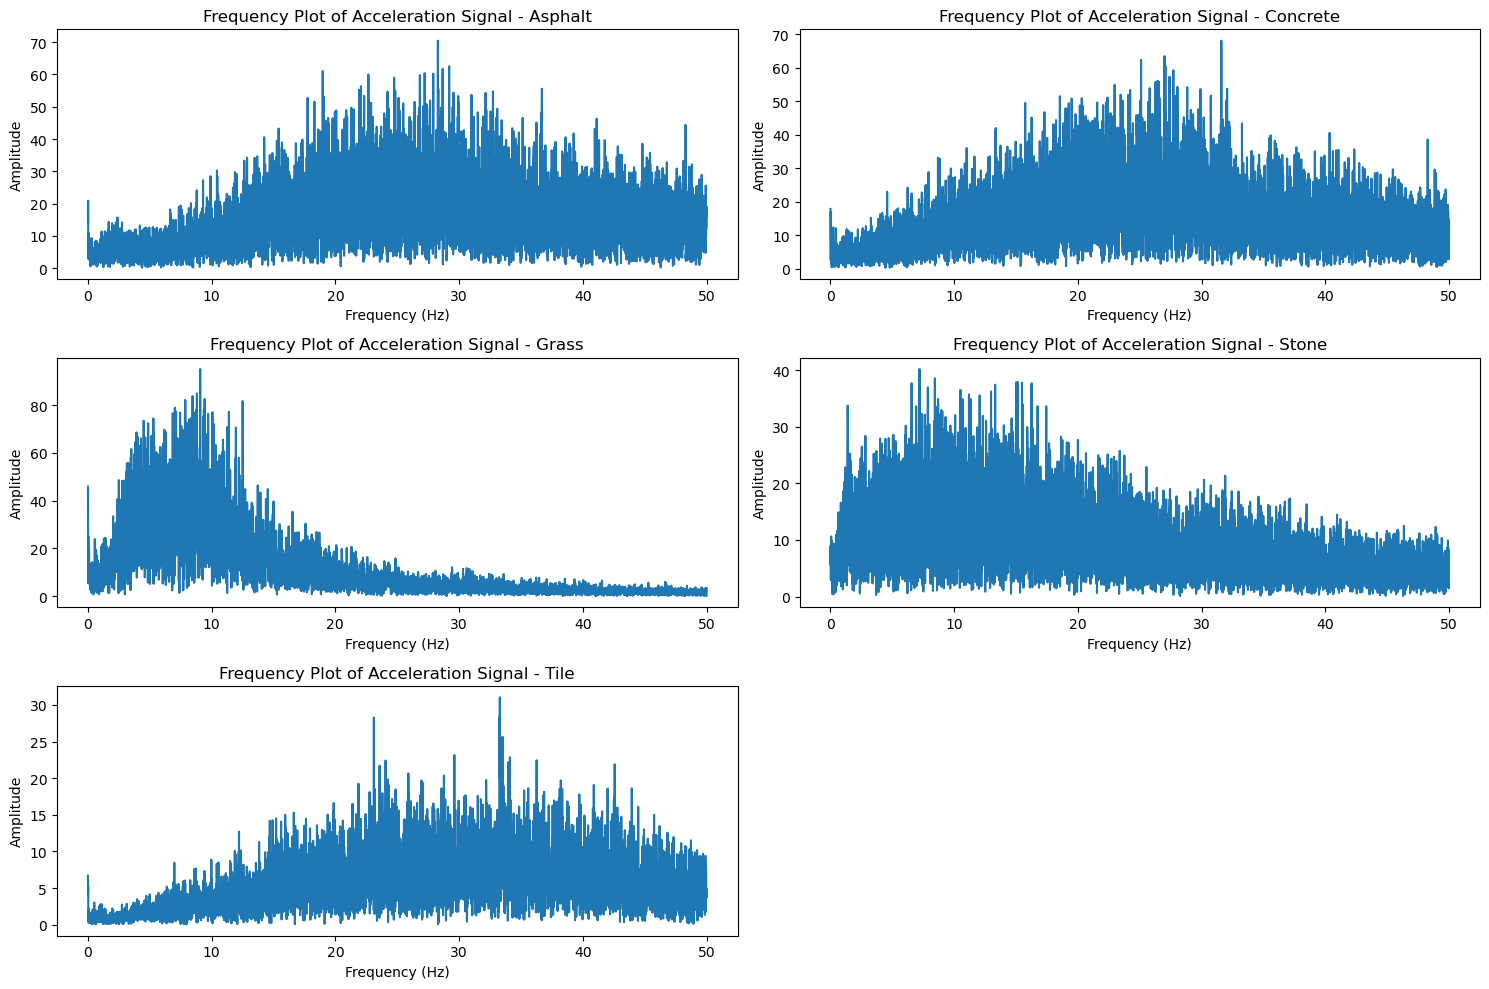

In [30]:
dataframe_list = [asphalt_consolidated_df2, concrete_consolidated_df, grass_consolidated_df, stone_consolidated_df, tile_consolidated_df]

names_list = ['Asphalt', 'Concrete', 'Grass', 'Stone', 'Tile']

fs = 100

plt.figure(figsize = (15, 10))

for index, (df, name) in enumerate(zip(dataframe_list, names_list)):

    fft_result= np.fft.fft(df['accelerometer'])

    fft_freq= np.fft.fftfreq(len(df['accelerometer']), 1/fs)

    positive_freqs = fft_freq > 0

    plt.subplot(3, 2, index + 1)
    
    plt.plot(fft_freq[positive_freqs], np.abs(fft_result[positive_freqs]))
    
    plt.title(f'Frequency Plot of Acceleration Signal - {name}')
    
    plt.xlabel('Frequency (Hz)')
    
    plt.ylabel('Amplitude')

plt.tight_layout()

plt.show()

The frequency plot of the acceleration data of the five surfaces shows high amplitude spikes at very low frequencies (0 HZ) which may suggest npise or the influence of gravitational acceleration data.

Additionally, each surface exhibits different amplitude peaks, with tile having the lowest and grass the highest. The concrete and asphalt have quite similar behavior (pattern). Extracting the peak amplitude during feature extraction can help to improve surface classifications.

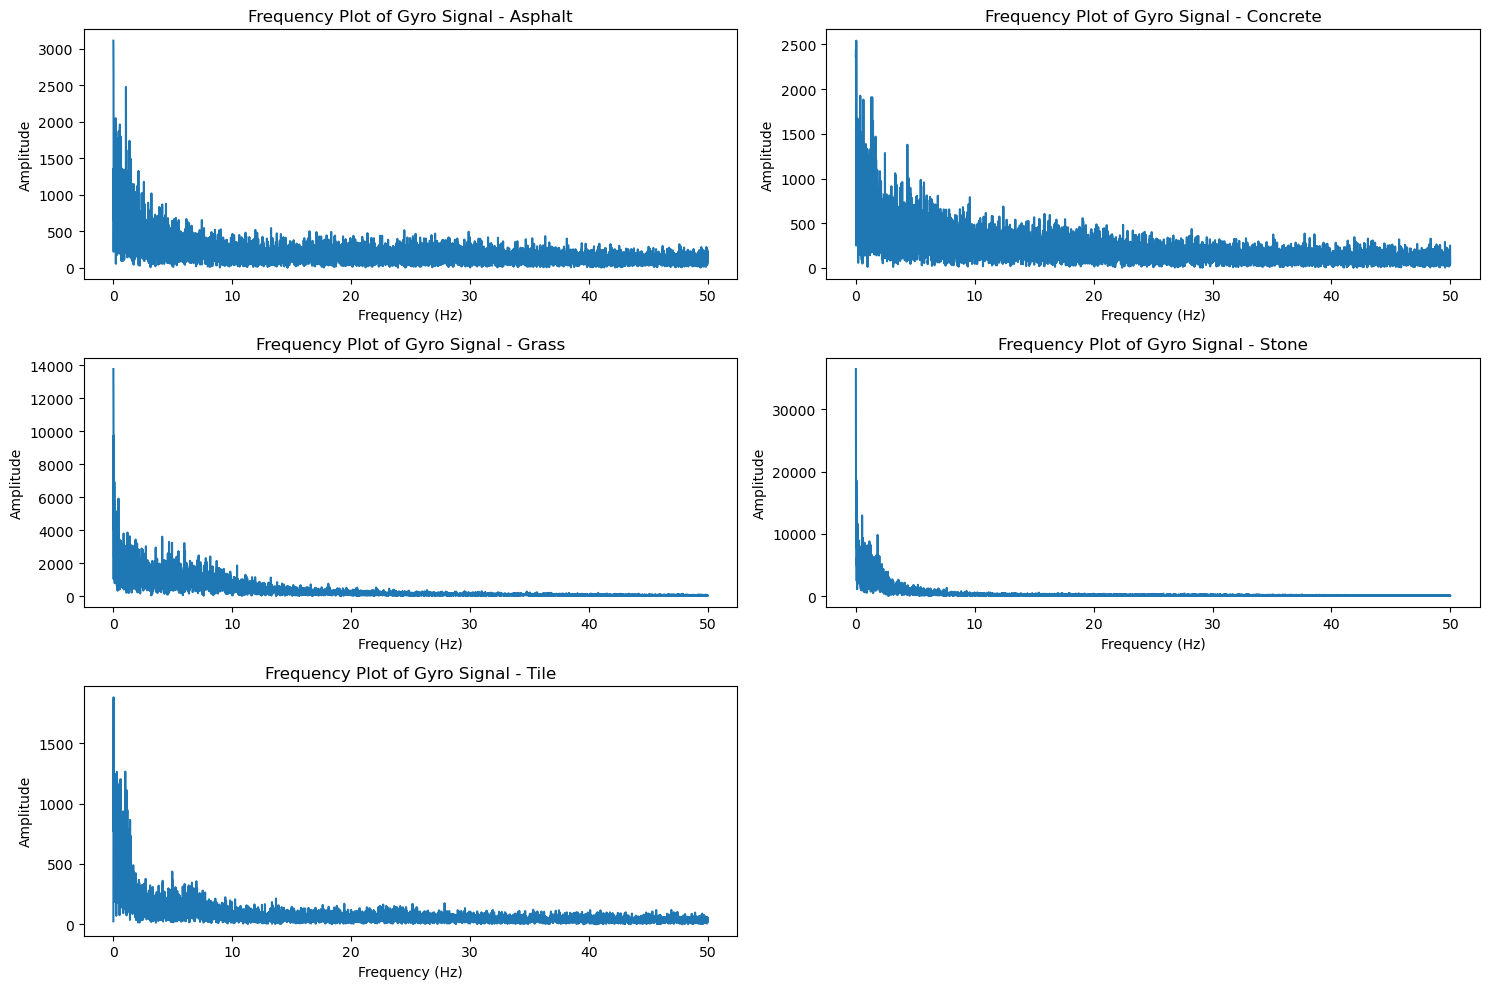

In [31]:
plt.figure(figsize = (15, 10))

for index, (df, name) in enumerate(zip(dataframe_list, names_list)):
    
    fft_result= np.fft.fft(df['gyro'])

    fft_freq= np.fft.fftfreq(len(df['gyro']), 1/fs)

    positive_freqs = fft_freq > 0

    plt.subplot(3, 2, index + 1)
    
    plt.plot(fft_freq[positive_freqs], np.abs(fft_result[positive_freqs]))
    
    plt.title(f'Frequency Plot of Gyro Signal - {name}')
    
    plt.xlabel('Frequency (Hz)')
    
    plt.ylabel('Amplitude')

plt.tight_layout()

plt.show()

The gyroscopic frquency plot for for the five surfaces shows a flat amplitude at high frequencies typically indicative of linear motion. The high amplitude at the low frequencies is characterizing the different (angular) turning of the wheel of the rollator as we moved through the different surfaces.

The stone surface shows the greatest low-frequency amplitude, possibly due to its roughness. On the other hand, the tile surface exhbits the lowest amplitude at these frequencies, likely because of its smoothness.

The grass's slope might also contribute to its low-frequency amplitude observed in the plot.

Extracting the peak amplitude of the gyroscopic data into feature extraction could imporvethe surface classification.

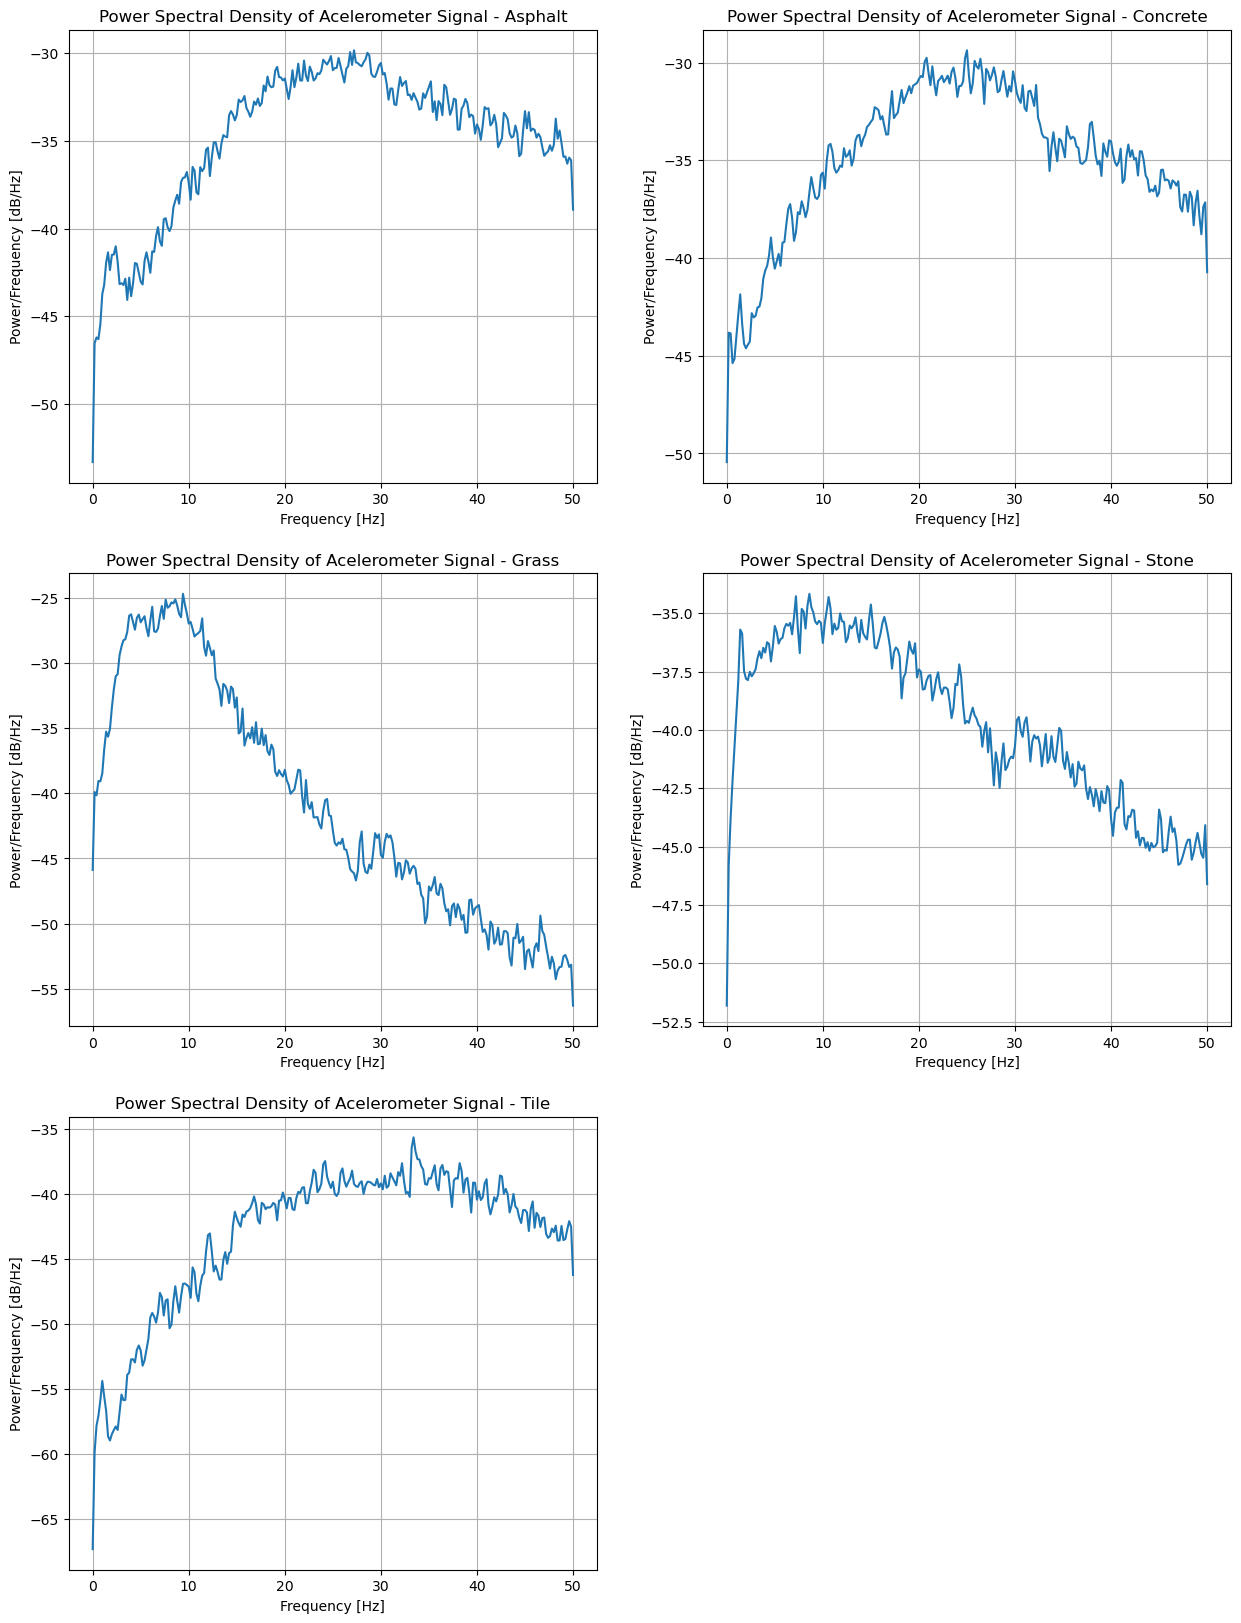

In [32]:
plt.figure(figsize = (15, 20))

for index, (df, name) in enumerate(zip(dataframe_list, names_list)):

    signal = df['accelerometer']

    fs = 100

    frequencies, psd = welch(signal, fs, nperseg = 500)

    psd_dB = 10 * np.log10(psd)

    plt.subplot(3, 2, index + 1)

    plt.plot(frequencies, psd_dB)

    plt.title(f'Power Spectral Density of Acelerometer Signal - {name}')
    
    plt.xlabel('Frequency [Hz]')
    
    plt.ylabel('Power/Frequency [dB/Hz]')
    
    plt.grid(True)

plt.show()

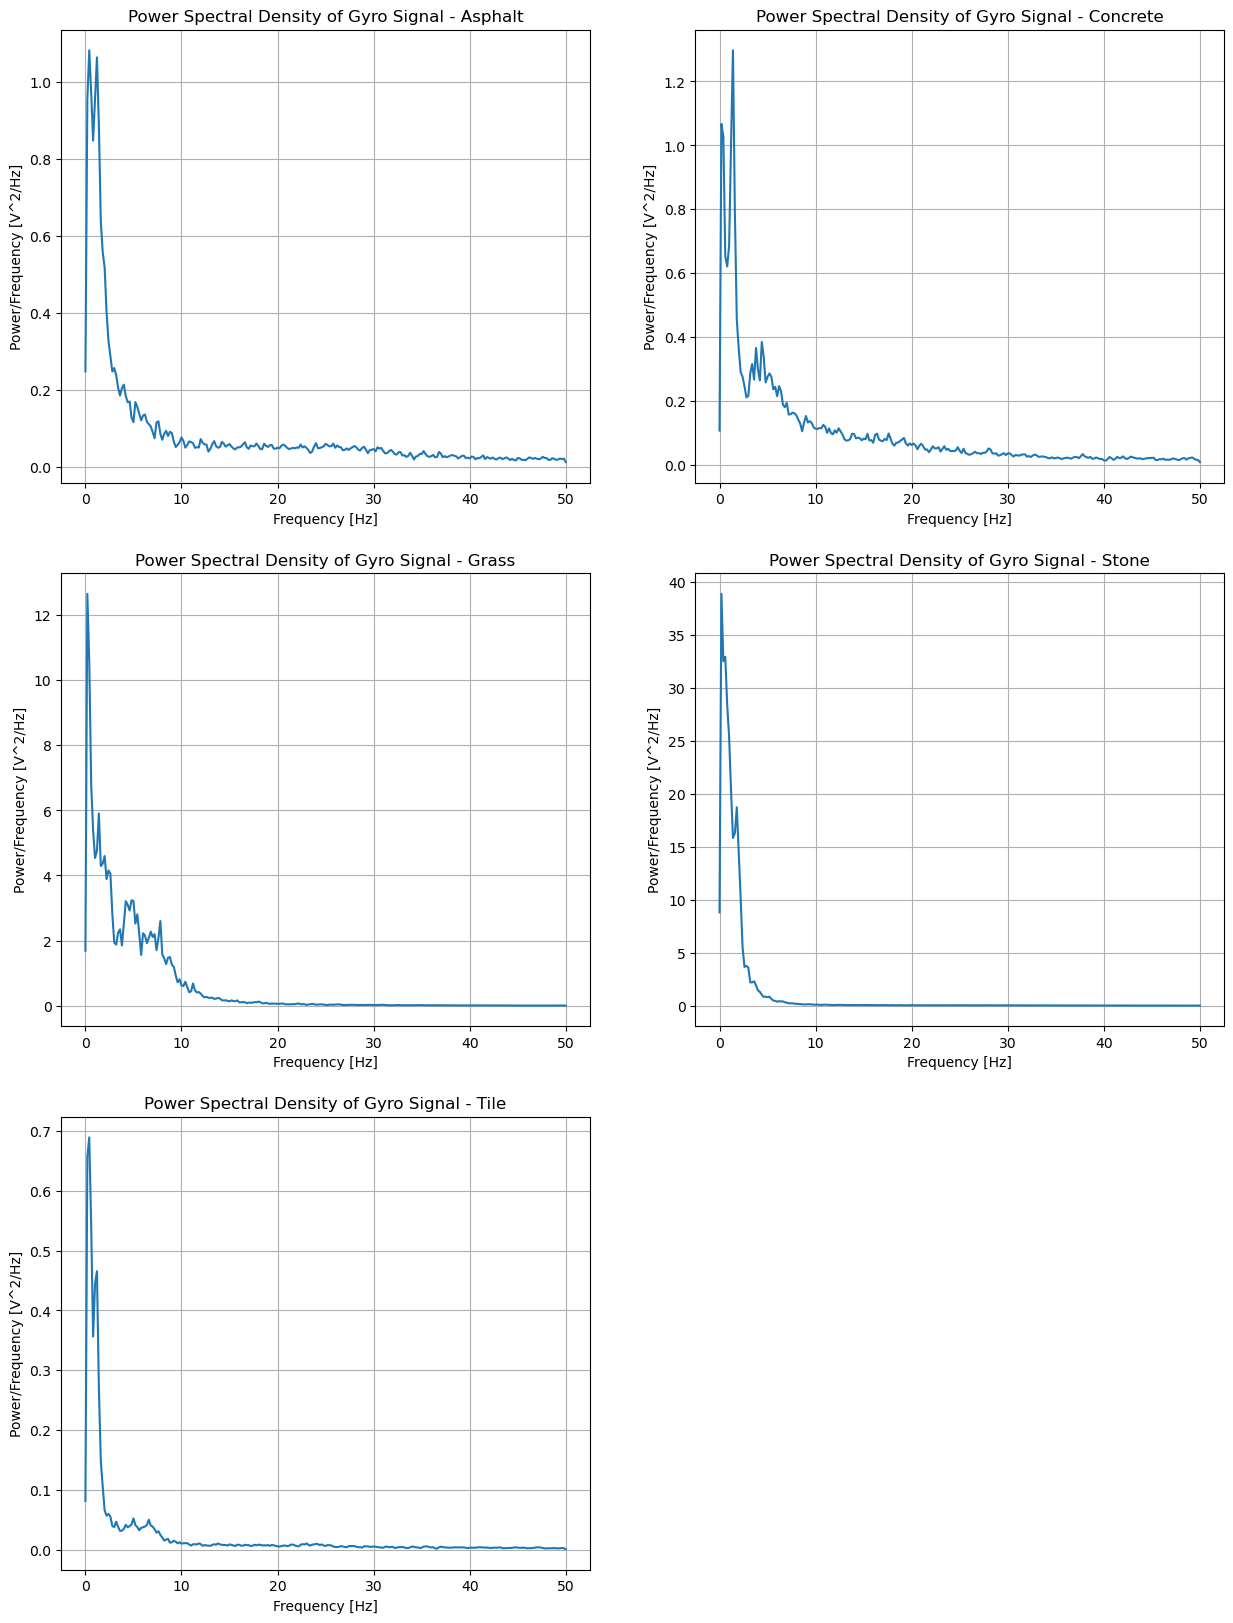

In [33]:
plt.figure(figsize = (15, 20))

for index, (df, name) in enumerate(zip(dataframe_list, names_list)):

    signal = df['gyro']

    fs = 100

    frequencies, psd = welch(signal, fs, nperseg = 500)

    psd_dB = 10 * np.log10(psd)

    plt.subplot(3, 2, index + 1)

    plt.plot(frequencies, psd)

    plt.title(f'Power Spectral Density of Gyro Signal - {name}')
    
    plt.xlabel('Frequency [Hz]')
    
    plt.ylabel('Power/Frequency [V^2/Hz]')
    
    plt.grid(True)

plt.show()